In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [118]:
df= pd.read_csv('Subscription Data Capstone Project.csv')

In [119]:
df.head()

,User_ID,Subscription_Type,Join_Date,Churn_Flag,Age,Gender,Monthly_Viewing_Hours,Genres_Watched,Support_Tickets,Discount_Used,Payment_Method,Auto_Renew_Enabled,Last_Login_Date,Number_of_Devices
0,1917ba4a-9eb2-4737-adf6-52c68429e60d,Standard,28/08/2024,1,64,Other,56.3,7,2,No,Credit Card,Yes,30/04/2025,3
1,a7dddc1b-317d-4261-8f21-997c9188561f,Premium,25/09/2023,0,29,M,31.3,4,1,Yes,Mobile Money,No,11/4/2025,3
2,99ba7fe2-b0f5-43ec-9501-93260544723d,Free Trial,3/11/2024,0,33,F,47.2,6,1,No,Credit Card,No,13/04/2025,1
3,e43ac1e7-6d1e-4c72-a71a-76ef31a6ced6,Standard,19/08/2024,0,41,F,81.0,4,0,Yes,Mobile Money,Yes,21/04/2025,4
4,d55d7e3f-b956-4423-b9da-3fc1eef1c0ef,Standard,4/5/2025,0,36,Other,45.7,6,3,No,PayPal,No,3/5/2025,5


In [120]:
df.shape

(1000, 14)

In [121]:
df.describe

<bound method NDFrame.describe of                                   User_ID Subscription_Type   Join_Date  \
0    1917ba4a-9eb2-4737-adf6-52c68429e60d          Standard  28/08/2024   
1    a7dddc1b-317d-4261-8f21-997c9188561f           Premium  25/09/2023   
2    99ba7fe2-b0f5-43ec-9501-93260544723d        Free Trial   3/11/2024   
3    e43ac1e7-6d1e-4c72-a71a-76ef31a6ced6          Standard  19/08/2024   
4    d55d7e3f-b956-4423-b9da-3fc1eef1c0ef          Standard    4/5/2025   
..                                    ...               ...         ...   
995  c7b4db1d-92c6-4f79-8468-951d2ef9869e        Free Trial  30/12/2023   
996  ee55c59d-de20-4093-bd5f-813483467238        Free Trial  22/12/2024   
997  58cab762-2160-4e34-b4c2-7bb888bc7e8d           Premium    7/4/2025   
998  bae2ad8e-07d0-4246-8d35-aabb6b901603           Premium  14/08/2023   
999  9d6e108e-ad19-4728-869b-9e2472e4cd6a          Standard    5/4/2024   

     Churn_Flag  Age Gender  Monthly_Viewing_Hours  Genres_Watche

In [122]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [123]:
df.isnull().sum()

User_ID                  0
Subscription_Type        0
Join_Date                0
Churn_Flag               0
Age                      0
Gender                   0
Monthly_Viewing_Hours    0
Genres_Watched           0
Support_Tickets          0
Discount_Used            0
Payment_Method           0
Auto_Renew_Enabled       0
Last_Login_Date          0
Number_of_Devices        0
dtype: int64

In [124]:
# Convert the Join_Date and Last_Login_Date columns from string to date datatypes

df['Join_Date'] = pd.to_datetime(df['Join_Date'])

df['Last_Login_Date'] = pd.to_datetime(df['Last_Login_Date'])

C:\Users\USER\AppData\Local\Temp\ipykernel_22712\1181146078.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Join_Date'] = pd.to_datetime(df['Join_Date'])
C:\Users\USER\AppData\Local\Temp\ipykernel_22712\1181146078.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Last_Login_Date'] = pd.to_datetime(df['Last_Login_Date'])


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   User_ID                1000 non-null   object        
 1   Subscription_Type      1000 non-null   object        
 2   Join_Date              1000 non-null   datetime64[ns]
 3   Churn_Flag             1000 non-null   int64         
 4   Age                    1000 non-null   int64         
 5   Gender                 1000 non-null   object        
 6   Monthly_Viewing_Hours  1000 non-null   float64       
 7   Genres_Watched         1000 non-null   int64         
 8   Support_Tickets        1000 non-null   int64         
 9   Discount_Used          1000 non-null   object        
 10  Payment_Method         1000 non-null   object        
 11  Auto_Renew_Enabled     1000 non-null   object        
 12  Last_Login_Date        1000 non-null   datetime64[ns]
 13  Numb

In [126]:
#Get today's date and create a new column name (Analysis_Date) in the dataframe

today_date = pd.Timestamp.today().normalize()
today_date
df['Analysis_Date'] = today_date

In [127]:
df.head()

,User_ID,Subscription_Type,Join_Date,Churn_Flag,Age,Gender,Monthly_Viewing_Hours,Genres_Watched,Support_Tickets,Discount_Used,Payment_Method,Auto_Renew_Enabled,Last_Login_Date,Number_of_Devices,Analysis_Date
0,1917ba4a-9eb2-4737-adf6-52c68429e60d,Standard,2024-08-28,1,64,Other,56.3,7,2,No,Credit Card,Yes,2025-04-30,3,2025-06-03
1,a7dddc1b-317d-4261-8f21-997c9188561f,Premium,2023-09-25,0,29,M,31.3,4,1,Yes,Mobile Money,No,2025-04-11,3,2025-06-03
2,99ba7fe2-b0f5-43ec-9501-93260544723d,Free Trial,2024-11-03,0,33,F,47.2,6,1,No,Credit Card,No,2025-04-13,1,2025-06-03
3,e43ac1e7-6d1e-4c72-a71a-76ef31a6ced6,Standard,2024-08-19,0,41,F,81.0,4,0,Yes,Mobile Money,Yes,2025-04-21,4,2025-06-03
4,d55d7e3f-b956-4423-b9da-3fc1eef1c0ef,Standard,2025-05-04,0,36,Other,45.7,6,3,No,PayPal,No,2025-05-03,5,2025-06-03


In [128]:
df['Tenure_Days'] = (pd.Timestamp.today() - df['Join_Date']).dt.days #Create a new column Tenure Days
df['Days_Since_Last_Login'] = (pd.Timestamp.today() - df['Last_Login_Date']).dt.days
df['Discount_Used'] = df['Discount_Used'].map({'Yes': 1, 'No': 0})
df['Auto_Renew_Enabled'] = df['Auto_Renew_Enabled'].map({'Yes': 1, 'No': 0})

In [129]:
df=df.drop(columns=['Join_Date','Last_Login_Date'])

In [130]:
df.head()

,User_ID,Subscription_Type,Churn_Flag,Age,Gender,Monthly_Viewing_Hours,Genres_Watched,Support_Tickets,Discount_Used,Payment_Method,Auto_Renew_Enabled,Number_of_Devices,Analysis_Date,Tenure_Days,Days_Since_Last_Login
0,1917ba4a-9eb2-4737-adf6-52c68429e60d,Standard,1,64,Other,56.3,7,2,0,Credit Card,1,3,2025-06-03,279,34
1,a7dddc1b-317d-4261-8f21-997c9188561f,Premium,0,29,M,31.3,4,1,1,Mobile Money,0,3,2025-06-03,617,53
2,99ba7fe2-b0f5-43ec-9501-93260544723d,Free Trial,0,33,F,47.2,6,1,0,Credit Card,0,1,2025-06-03,212,51
3,e43ac1e7-6d1e-4c72-a71a-76ef31a6ced6,Standard,0,41,F,81.0,4,0,1,Mobile Money,1,4,2025-06-03,288,43
4,d55d7e3f-b956-4423-b9da-3fc1eef1c0ef,Standard,0,36,Other,45.7,6,3,0,PayPal,0,5,2025-06-03,30,31


In [131]:
df['Estimated_Login_Frequency'] = df['Tenure_Days'] - df['Days_Since_Last_Login']
print('Estimated_Login_Frequency')

Estimated_Login_Frequency


1.	What is the overall churn rate?

In [132]:
#The overall churn rate is 47.4%

Total_customers= len(df)  # Count total customers
churned_customers = df['Churn_Flag'].sum() #Count churned customers (where churn_flag = 1)
Churn_rate= (churned_customers/Total_customers)*100 # Calculate churn rate as percentage
print(Churn_rate)

47.4


2.	How does churn vary by subscription type

In [133]:
# The Premium plan had the highest average churn rate of 48.57% while the Basic plan had the lowest at 46.52%

churn_by_subscription= df.groupby('Subscription_Type')['Churn_Flag'].mean().sort_values(ascending=False)*100
print(churn_by_subscription)

Subscription_Type
Premium       48.571429
Standard      47.413793
Free Trial    46.899225
Basic         46.521739
Name: Churn_Flag, dtype: float64


3.	Is there a relationship between age and churn?

Age_Category
Youth     48.739496
Adult     47.311828
Senior    46.153846
Child           NaN
Name: Churn_Flag, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_22712\3018694300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age_category = (df.groupby('Age_Category')['Churn_Flag'].mean().sort_values(ascending=False)*100) #Find the average churn rate per age category


<Axes: title={'center': 'Age Distribution by Churn Status'}, xlabel='Age_Category'>

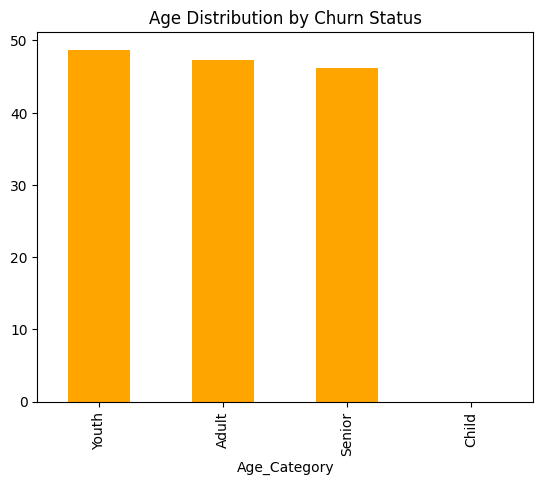

In [134]:

# There is a high churn rate among the youth 17-35years (48.74%), while the seniors 50-70years had the lowest churn rate (46.15%)

bins = [0, 17, 35, 50, 70] 

labels = ['Child', 'Youth', 'Adult', 'Senior'] #To group data into discrete categories
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True) #Create a new column for age category
churn_by_age_category = (df.groupby('Age_Category')['Churn_Flag'].mean().sort_values(ascending=False)*100) #Find the average churn rate per age category
print(churn_by_age_category)
churn_by_age_category.plot.bar(title= 'Age Distribution by Churn Status', color ='orange') #Plotting on bar graph

4.	Do support tickets correlate with higher churn?

In [135]:
df.groupby('Churn_Flag')['Support_Tickets'].count()


Churn_Flag
0    526
1    474
Name: Support_Tickets, dtype: int64

Support_Ticket_Category
Low         48.0
Moderate    43.0
High        33.0
Name: Churn_Flag, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_22712\2471804672.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_support_tickets= (df.groupby('Support_Ticket_Category')['Churn_Flag'].mean() * 100).round(0) #Find the support tickets with a higher average churn rate


<Axes: title={'center': 'Churn Rate by Support Ticket Category'}, xlabel='Support_Ticket_Category'>

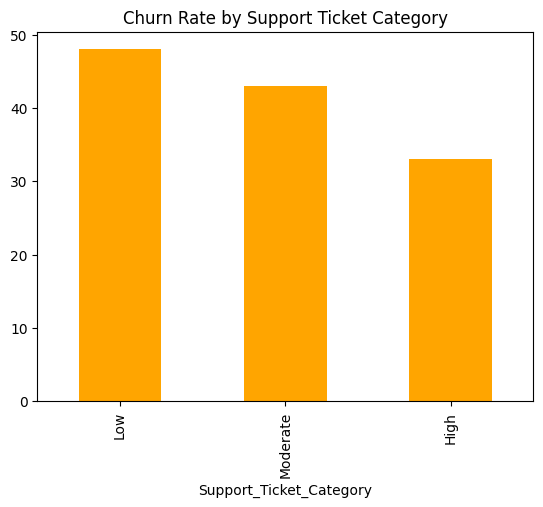

In [136]:
#Customers with low number of support tickets had the highest average churn rate (47.8%) while those with a high number of support tickets had the lowest(33.3%)

bins = [0, 2, 4, 6] 
labels = ['Low', 'Moderate', 'High'] #To group data into discrete categories
df['Support_Ticket_Category'] = pd.cut(df['Support_Tickets'], bins=bins, labels=labels, include_lowest=True) #Create a new column for support tickets category
churn_by_support_tickets= (df.groupby('Support_Ticket_Category')['Churn_Flag'].mean() * 100).round(0) #Find the support tickets with a higher average churn rate
print(churn_by_support_tickets)
churn_by_support_tickets.plot.bar(x='Support_Ticket_Category', title= 'Churn Rate by Support Ticket Category', color='orange') #Plotting on bar graph

5.	How does viewing behavior differ between churned and retained customers?

In [137]:
 # The retained customers spent more viewing hours 40.26 compared to the churned customers 39.43
 
Churned_Monthly_Viewing_Hours = (df.groupby('Churn_Flag')['Monthly_Viewing_Hours'].mean()).round(2)
print(Churned_Monthly_Viewing_Hours)

Churn_Flag
0    40.26
1    39.43
Name: Monthly_Viewing_Hours, dtype: float64


6.	Is there a "critical period" after sign-up when churn risk is highest?

In [ ]:
#Average tenure
avg_churned = df[df['Churn_Flag'] == 1]['Tenure_Days'].mean()
avg_retained = df[df['Churn_Flag'] == 0]['Tenure_Days'].mean()
print(avg_churned)
print(avg_retained)

df['Tenure_Months'] = (df['Tenure_Days'] / 30).round(1)
print('Tenure_Months')

381.05274261603375
394.787072243346
Tenure_Months


7.	Does payment method affect churn probability?

In [ ]:
# Calculate churn rate by payment method
#Paypal had the highest churn rate of 48.04% while credit card had the lowest at 46.43%

churn_by_payment = (df.groupby('Payment_Method')['Churn_Flag'].mean().sort_values(ascending=False) * 100)
print(churn_by_payment)


Payment_Method
PayPal          48.036254
Mobile Money    47.747748
Credit Card     46.428571
Name: Churn_Flag, dtype: float64


8.	How does the use of discounts at sign-up relate to long-term retention?

Discount_Used
0    50.304260
1    44.575937
Name: Churn_Flag, dtype: float64


<Axes: title={'center': 'Churn Rate by Discount'}, xlabel='Discount_Used'>

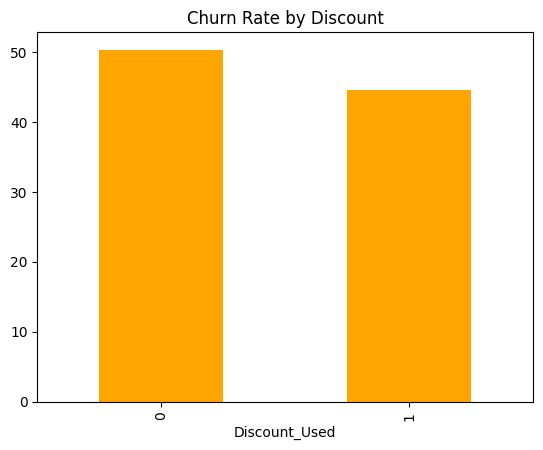

In [161]:
# Churn rate by discount usage
churn_by_discount = (df.groupby('Discount_Used')['Churn_Flag'].mean() * 100)
print(churn_by_discount)
churn_by_discount.plot.bar(title= 'Churn Rate by Discount', color='orange')